# Example of Two molecules from BeeTox Datasets

In [52]:
push!(LOAD_PATH, joinpath(pwd(), "src"))
include("src/cpk_colors.jl")
using MolecularGraph, CSV, DataFrames, Graphs, MetaGraphs, Colors, GraphPlot, Xtals, RWK, Cairo, Compose, Plots

In [53]:
data = CSV.read("new_smiles.csv", DataFrame)
# choose #7 and #134
# choose #35 and #134
mol_a = smilestomol(data[35, "SMILES"])
mol_b = smilestomol(data[134, "SMILES"])

GraphMol{SmilesAtom, SmilesBond}([Dict(1 => 2), Dict(2 => 3, 1 => 1), Dict(5 => 6, 4 => 5, 2 => 2, 3 => 4), Dict(3 => 3), Dict(4 => 3), Dict(5 => 3, 6 => 7), Dict(6 => 6)], [(1, 2), (2, 3), (3, 4), (3, 5), (3, 6), (6, 7)], SmilesAtom[SmilesAtom(:C, 0, 1, nothing, false, :unspecified), SmilesAtom(:O, 0, 1, nothing, false, :unspecified), SmilesAtom(:P, 0, 1, nothing, false, :unspecified), SmilesAtom(:N, 0, 1, nothing, false, :unspecified), SmilesAtom(:O, 0, 1, nothing, false, :unspecified), SmilesAtom(:S, 0, 1, nothing, false, :unspecified), SmilesAtom(:C, 0, 1, nothing, false, :unspecified)], SmilesBond[SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(2, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified)], Dict{Symbol, Any}(), Dict{Symbol, Any}())

In [54]:
function viz_graph(mol::GraphMol)
    node_number = length(atomsymbol(mol))
    graph = SimpleGraph(node_number)
    for (vᵢ, vⱼ) in mol.edges
        add_edge!(graph, vᵢ, vⱼ)
    end
    edgelabels = ["$b" for b in bondorder(mol)]
    edgelabels[isaromaticbond(mol)] .= "a"
	gplot(graph,
	      nodefillc = [RGB((DEFAULT_CPK_COLORS[a] ./ 255)...) for a in atomsymbol(mol)],
	      nodestrokec = colorant"black",
	      nodestrokelw = 3,
          nodelabel = ["$i" for i = 1:nv(graph)],
          edgelinewidth = 2,
          edgelabel = edgelabels)
end

viz_graph (generic function with 1 method)

## Draw the structure and graph representation of Mol A

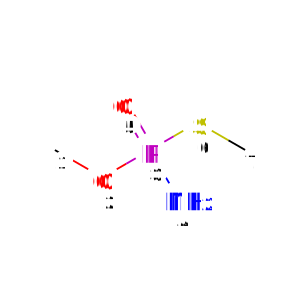

In [70]:
# structure
canvas = SvgCanvas()
draw2d!(canvas, mol_a)
drawatomindex!(canvas, mol_a)
mol_a_svg = tosvg(canvas, 300, 300)
display("image/svg+xml", mol_b_svg)

In [64]:
# graph representation
a = viz_graph(mol_a)
# save to pdf
draw(PDF("mol_a.pdf", 16cm, 16cm), a)

## Draw the structure and graph representation of Mol B

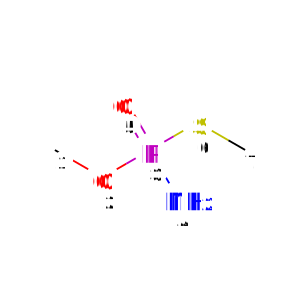

In [58]:
# structure
canvas = SvgCanvas()
draw2d!(canvas, mol_b)
drawatomindex!(canvas, mol_b, bgcolor=MolecularGraph.Color(255, 255, 255))
mol_b_svg = tosvg(canvas, 300, 300)
display("image/svg+xml", mol_b_svg)

In [59]:
# graph representation
b = viz_graph(mol_b)
# save to pdf
draw(PDF("mol_b.pdf", 16cm, 16cm), b)

## Draw the direct product graph of a x b

In [60]:
axb = direct_product_graph(mol_a, mol_b, store_vertex_pair=true, store_nodelabel=true, store_edgelabel=true)

{17, 7} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

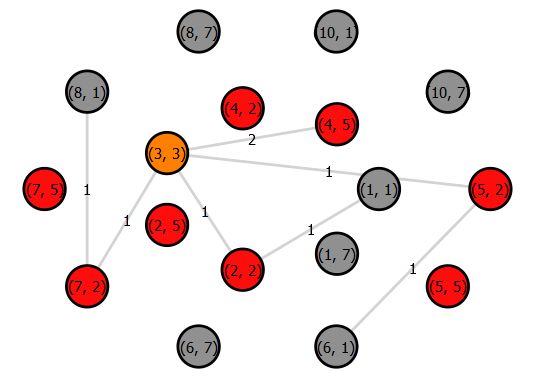

In [61]:
axb_node = [get_prop(axb, i, :label) for i in vertices(axb)]
axb_color = [RGB((DEFAULT_CPK_COLORS[node] ./ 255)...) for node in axb_node]
axb_nodepair = [get_prop(axb, i, :vertex_pair) for i in vertices(axb)]
axb_edgelabel = [get_prop(axb, i, :bondorder) for i in 1:ne(axb)]
order_list = ["$i" for i = 1:nv(axb)]
nlist = Vector{Vector{Int}}(undef, 2) # two shells
nlist[1] = 1:7 # first shell
nlist[2] = 8:17 # second shell
locs_x, locs_y = shell_layout(axb, nlist)
g = gplot(axb, locs_x, locs_y, 
      nodefillc = axb_color,
      nodestrokec = colorant"black",
      nodestrokelw = 3,
      NODESIZE = 0.4 / sqrt(nv(axb)),
      nodelabel = axb_nodepair,
      edgelinewidth = 1,
      edgelabel = axb_edgelabel,
      edgelabelsize = 2.0)

In [62]:
# save to pdf
draw(PDF("dpg.pdf", 16cm, 16cm), g)